# 1 Author

**Student Name**: Salman Ali Sayyed

**Student ID**: 220663575



# 2 Problem formulation
**Advance Components**

The problem that we are about to solve is to predict the spot of the audio given the audio file and the area to which the audio belongs. The model will classify audio into six different spots based on the area provided.

# 3 Machine Learning pipeline
For the solution of the above problem of multi class classification, following steps had been taken.
Since the audio data had already been loaded in problem 1 that step has been excluded
1. **Reading csv: The csv with the labels and the files name had been read and analyzed.
2. **Feature extraction**: To extract the features of audio file using the csv we had defined two function getPitch and getXy. Along with all the features that were used for problem 1 we had added indices of area of audio in the predictors and indices of spot of that particular area of audio file as the label.
3. **Splitting dataset**: The predictors and labels had been splitted into train and validation set using sklearn and in the ratio of 70:30.
4. **Selecting model**: After trying and  adjusting certain hyperparameters of various classifiers. Our model had been narrowed down to RandomForestClassifier with the hyperparameter as the code below
6. **Validation**: Since it is a multiclass classification accuracy, precision, recall and f1-score are not sufficient that is why we had used confusion matrix to get a brief overview of our model performance. 


In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory_path='/content/drive/MyDrive/Data/ml_full_dataset/1_dataset/*.wav'
files=glob.glob(directory_path)

MLEndLS=pd.read_csv('./MLEndLS.csv').set_index('file_id')

# 4 Transformation stage

1. **Label Transformation**: Since we want to know which spot the audio belong based on the area we need to encode the area of the audio file along with it's corresponding spots. All the possible combinations of the areas and spots are encoded in the getXy function and an index or a number is assigned to each one of it and the index of the area along with audio power, pitch mean, pitch standard deviation, audio spectral features such as spectral bandwidth, spectral centroid etc are assigned as the predictors and the index of spot of audio file had been set as label.

2. **Feature extraction**: Since noise of a audio file can easily be detected using the spectal fewatures of audio. Therefore spectral features along with index of area and pitch had been used as label

3. **Feature transformation**:
As all the features extracted are in the form of numpy array therefore there mean is taken and used as predictors.
As after applying principle component analysis accuracy was decreasing hence it's not been implemented.

In [4]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [5]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    if(labels_file.loc[fileID]['area']=='campus'):
      area=0
      if(labels_file.loc[fileID]['spot']=='square'):
        yi=0
      elif(labels_file.loc[fileID]['spot']=='library'):
        yi=1
      elif(labels_file.loc[fileID]['spot']=='canal'):
        yi=2
      elif(labels_file.loc[fileID]['spot']=='reception'):
        yi=3
      elif(labels_file.loc[fileID]['spot']=='ground'):
        yi=4
      else:
        yi=5
    elif(labels_file.loc[fileID]['area']=='british'):
      area=1
      if(labels_file.loc[fileID]['spot']=='forecourt'):
        yi=0
      elif(labels_file.loc[fileID]['spot']=='greatcourt'):
        yi=1
      elif(labels_file.loc[fileID]['spot']=='room12'):
        yi=2
      elif(labels_file.loc[fileID]['spot']=='room23'):
        yi=3
      elif(labels_file.loc[fileID]['spot']=='street'):
        yi=4
      else:
        yi=5
    elif(labels_file.loc[fileID]['area']=='westend'):
      area=2
      if(labels_file.loc[fileID]['spot']=='piazza'):
        yi=0
      elif(labels_file.loc[fileID]['spot']=='market'):
        yi=1
      elif(labels_file.loc[fileID]['spot']=='charing'):
        yi=2
      elif(labels_file.loc[fileID]['spot']=='trafalgar'):
        yi=3
      elif(labels_file.loc[fileID]['spot']=='national'):
        yi=4
      else:
        yi=5
    elif(labels_file.loc[fileID]['area']=='southbank'):
      area=3
      if(labels_file.loc[fileID]['spot']=='waterloo'):
        yi=0
      elif(labels_file.loc[fileID]['spot']=='royal'):
        yi=1
      elif(labels_file.loc[fileID]['spot']=='food'):
        yi=2
      elif(labels_file.loc[fileID]['spot']=='skate'):
        yi=3
      elif(labels_file.loc[fileID]['spot']=='book'):
        yi=4
      else:
        yi=5
    elif(labels_file.loc[fileID]['area']=='kensington'):
      area=4
      if(labels_file.loc[fileID]['spot']=='cromwell'):
        yi=0
      elif(labels_file.loc[fileID]['spot']=='hintze'):
        yi=1
      elif(labels_file.loc[fileID]['spot']=='marine'):
        yi=2
      elif(labels_file.loc[fileID]['spot']=='dinosaur'):
        yi=3
      elif(labels_file.loc[fileID]['spot']=='pond'):
        yi=4
      else:
        yi=5
    else:
      area=5
      if(labels_file.loc[fileID]['spot']=='library'):
        yi=0
      elif(labels_file.loc[fileID]['spot']=='ritblat'):
        yi=1
      elif(labels_file.loc[fileID]['spot']=='upper'):
        yi=2
      elif(labels_file.loc[fileID]['spot']=='gardens'):
        yi=3
      elif(labels_file.loc[fileID]['spot']=='piazza'):
        yi=4
      else:
        yi=5

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    spectralCentroid=librosa.feature.spectral_centroid(y=x,sr=fs)
    spectral_bandwidth=librosa.feature.spectral_bandwidth(y=x,sr=fs)
    spectral_contrast=librosa.feature.spectral_contrast(y=x,sr=fs)
    spectral_flatness=librosa.feature.spectral_flatness(y=x)
    spectral_rolloff=librosa.feature.spectral_rolloff(y=x,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr,np.mean(spectralCentroid),np.mean(spectral_bandwidth),np.mean(spectral_contrast),np.mean(spectral_flatness),np.mean(spectral_rolloff),int(area)]
    X.append(xi)
    y.append(int(yi))

  return np.array(X),np.array(y)

In [ ]:
X,y = getXy(files, labels_file=MLEndLS, scale_audio=True, onlySingleDigit=True)

In [ ]:
import csv
import pickle

with open("X_2.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(X)
    
with open("y_2", "wb") as fp:
  pickle.dump(y, fp)

In [6]:
X=pd.read_csv('X_2.csv')
with open("y_2", "rb") as fp:
  y=pickle.load(fp)

y=np.delete(y,0)

print(X.shape)
print(y.shape)

(2491, 10)
(2491,)


# 5 Modelling
1. **Random Forest Classifier**: Random Forest Classifier was trained as it handles non-linearity of parameters effectively. As it was giving better accuracy as compared to SVM, Decision Tree Classifier and Logistic Regression it was choosen. The hyperparameters max_features=10, max_depth=10 had been taken based on the accuracy score and confusion matrices

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_features=10,max_depth=10)

# from sklearn import svm
# model=svm.SVC(C=2000)

# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()

# from sklearn.tree import DecisionTreeClassifier
# model=DecisionTreeClassifier()

model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10)

# 6 Methodology

The performance of the model is analysed based on certain scores or results which are as follows
1. **Accuracy**: Its the ratio of correct predictions by the total number of predictions.
2. **Confusion Matrix**:The confusion matrix is an n*n matrix that is used to measure the performance of classification models.

# 7 Dataset

1. 2491 audio files had been used in total
2. Input feature extraction and labelling is done for all of them.
3. Data is then divided into training and validation into 70:30 ratio

# 8 Results


In [14]:
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')
from sklearn import metrics
confusion_matrix_train = pd.DataFrame.from_records(metrics.confusion_matrix(y_val, yv_p))
confusion_matrix_val = pd.DataFrame.from_records(metrics.confusion_matrix(y_val, yv_p))
print("Confusion matrix for training \n",confusion_matrix_train)
print("\n")
print("Confusion matrix for validation \n", confusion_matrix_val)

Training Accuracy 0.9133677567412507
Validation  Accuracy 0.33288770053475936


Confusion matrix for training 
     0   1   2   3   4   5
0  45  25  16  25   9  12
1  31  37  12  11   7  15
2  17  20  44  14  22  14
3  19  21  19  35   9   9
4  13  15  21  10  42  28
5  14  19  14  12  26  46


Confusion matrix for validation 
     0   1   2   3   4   5
0  45  25  16  25   9  12
1  31  37  12  11   7  15
2  17  20  44  14  22  14
3  19  21  19  35   9   9
4  13  15  21  10  42  28
5  14  19  14  12  26  46


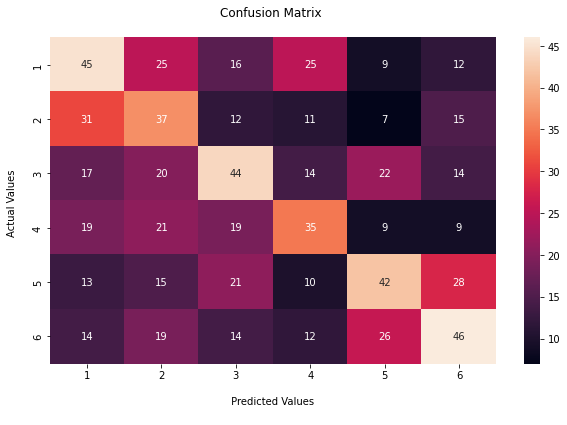

In [15]:
import seaborn as sns
plt.figure(figsize=(10,6))
fx= sns.heatmap(metrics.confusion_matrix(y_val, yv_p), annot=True)
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values \n')
fx.set_ylabel('Actual Values \n')

fx.xaxis.set_ticklabels([1, 2, 3, 4, 5, 6])
fx.yaxis.set_ticklabels([1, 2, 3, 4, 5, 6])
plt.show()

In [16]:
# Normalization
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

confusion_matrix_train = pd.DataFrame.from_records(metrics.confusion_matrix(y_val, yv_p))
confusion_matrix_val = pd.DataFrame.from_records(metrics.confusion_matrix(y_val, yv_p))
print("Confusion matrix for training \n",confusion_matrix_train)
print("\n")
print("Confusion matrix for validation \n", confusion_matrix_val)

Training Accuracy 0.9168100975329891
Validation  Accuracy 0.32754010695187163
Confusion matrix for training 
     0   1   2   3   4   5
0  48  27  12  23  11  11
1  32  36  10  14   7  14
2  23  19  37  14  22  16
3  15  21  18  37  10  11
4  16  14  16  11  45  27
5  16  20  14  13  26  42


Confusion matrix for validation 
     0   1   2   3   4   5
0  48  27  12  23  11  11
1  32  36  10  14   7  14
2  23  19  37  14  22  16
3  15  21  18  37  10  11
4  16  14  16  11  45  27
5  16  20  14  13  26  42


In [17]:
# PCA
from sklearn import preprocessing

normalized_data = preprocessing.normalize(X, axis = 0)
print(normalized_data.shape)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)


principalComponents=pca.fit_transform(normalized_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component1', 'principal_component2'])


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(principalDf,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=15)
# from sklearn import svm
# model=svm.SVC()

model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)


print('Training Accuracy after pca', np.mean(yt_p==y_train))
print('Validation  Accuracy after pca', np.mean(yv_p==y_val))

confusion_matrix_train = pd.DataFrame.from_records(metrics.confusion_matrix(y_val, yv_p))
confusion_matrix_val = pd.DataFrame.from_records(metrics.confusion_matrix(y_val, yv_p))
print("Confusion matrix for training \n",confusion_matrix_train)
print("\n")
print("Confusion matrix for validation \n", confusion_matrix_val)

(2491, 10)
Training Accuracy after pca 0.9810671256454389
Validation  Accuracy after pca 0.1804812834224599
Confusion matrix for training 
     0   1   2   3   4   5
0  29  15  32  12  13  15
1  24  22  41  10  23  20
2  23  15  23  11  26  21
3  19  16  26  13  22  15
4  23  23  27  11  21  23
5  24  20  23  15  25  27


Confusion matrix for validation 
     0   1   2   3   4   5
0  29  15  32  12  13  15
1  24  22  41  10  23  20
2  23  15  23  11  26  21
3  19  16  26  13  22  15
4  23  23  27  11  21  23
5  24  20  23  15  25  27


# 9 Conclusions

After training different models and comparing them through the defined metrices RandomForestClassifier was found to be the best
Since we have an imbalanced dataset and we are dealing with a problem ofmulticless classification we cannot rely on accuracy and we do need to analyse confusion matrix in order to get the better understanding regarding the performance of our model.
The scores of the model before and after normalization and after applying pca are as follows:

**Before Normalization**

Training Accuracy=0.9133677567412507

Validation Accuracy=0.33288770053475936

**After Normalization**

Training Accuracy=0.9168100975329891

Validation Accuracy=0.32754010695187163

**After applying pca

Training Accuracy=0.9810671256454389

Validation Accuracy=0.1804812834224599

Since the accuracy was better before applying pca than that after applying pca therefore I had decided not to apply pca to the predictors and stick to the 2nd set of results